# Kiva Machine Learning Solutions Project
### By Jacob Krevat, Mohamed Salad, & Joshua Hutcheson

In this project, our aim was to find a way to predict what countries qualify for loans from Kiva and what conditions actually require higher likelihood of loan contribution than others. In this process, we took the original dataset and combined it with another dataset that features the loan amounts of the country to see what features happen to be tied to the increase in loan distribution. By doing this, we concluded that Kiva would be able to use this model to predict other countries based on the features in the datasets below.

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

nullCount = 0;
validCount = 0;
meanMPI = {}
# to make this notebook's output stable across runs
np.random.seed(42)

# Import dataset
kiva_mpi_dataset = pd.read_csv("kiva_mpi.csv")
kiva_loan_dataset = pd.read_csv("kiva_loans.csv")
#kiva_loan_theme_ids = pd.read_csv("../loan_theme_ids.csv")

#kiva_dataset = np.hstack((a,b))

#kiva_dataset.info()

We start by plotting out all the locations of the MPI (Mass Poverty Index) on a global heat map. These will identify areas in which Kiva generally provides loans to.

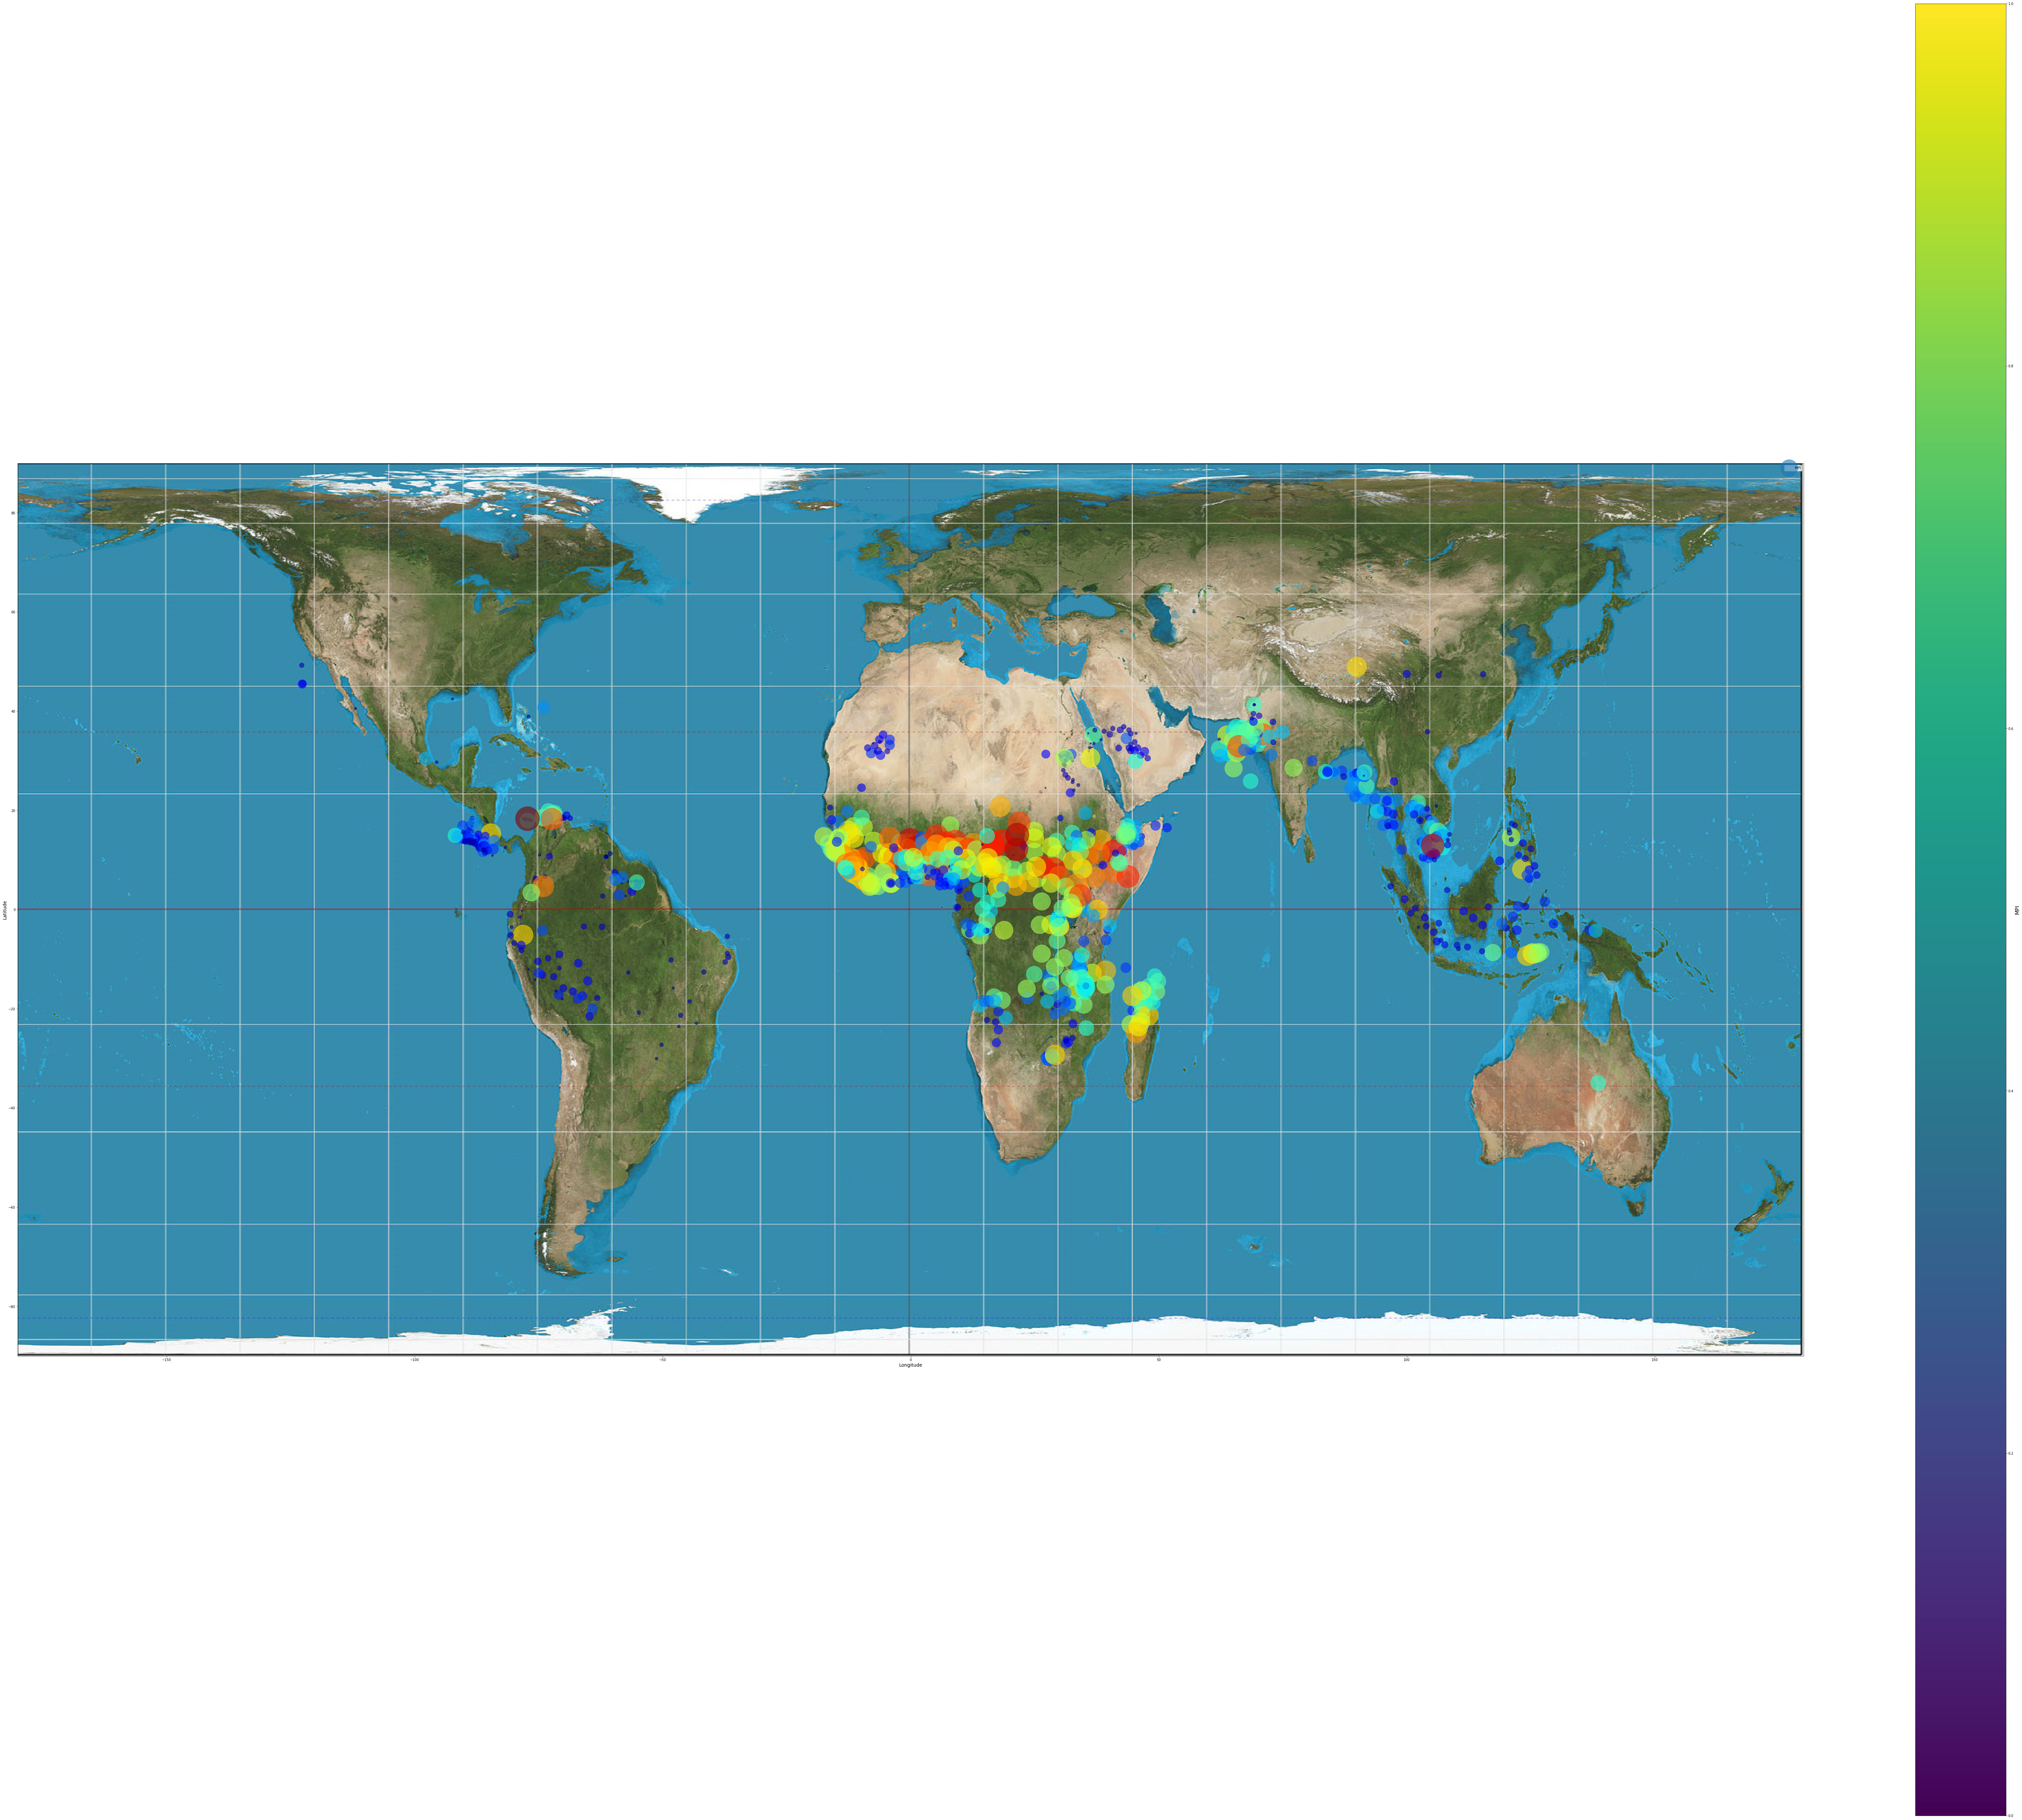

In [2]:
import matplotlib.image as mpimg

california_img=mpimg.imread('gallpeters.png')

ax = kiva_mpi_dataset.plot(kind="scatter", x="lon", y="lat", figsize=(120, 100), alpha=0.6, s=kiva_mpi_dataset["MPI"]*7000, label="MPI", c="MPI", cmap=plt.get_cmap("jet"),
                  colorbar=False)
plt.imshow(california_img, alpha=1, extent=[-180, 180, -90, 90], aspect='equal')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
cbar = plt.colorbar()
cbar.set_label('MPI', fontsize=16)
plt.show()

Next, we convert the MPI regions into countries. These region values will be used as our key for combining features from similar datasets.

In [3]:
# def func(region):
#     count = 0;
#     for row in kiva_mpi_dataset["region"]:
#         if row == region:
#             return count;
#         count = count+1
#     return -1;
count = 0
optimize = {}
for row in kiva_mpi_dataset["region"]:
    optimize[row] = count
    count = count+1
    
for index,row in kiva_mpi_dataset.iterrows():
    optimize[row["region"]] = row["MPI"]

In [4]:
#kiva_mpi_dataset["MPI"][func("Farah")]

In [5]:

#kiva_mpi_dataset["region"]
# for item in kiva_loan_dataset["region"]:
#     try:
#         if item in kiva_mpi_dataset["region"].unique():
#             #print(item)
#             validCount = validCount +1
#             #t = 1
#         else:
#             nullCount = nullCount + 1
#     except:
#         nullCount = nullCount+1
    
# print("Null MPI Rows: "+str(nullCount))
# print("Valid: "+str(validCount))
    #print(kiva_mpi_dataset["MPI"])
    #print("MPI: "+str(kiva_mpi_dataset["MPI"][func(item)]))

In [6]:
kiva_loan_dataset["country"].nunique()

87

In [7]:
#kiva_mpi_dataset

In [8]:

meanMPI = {}
index  =0
#kiva_mpi_dataset["region"]
for item in kiva_mpi_dataset["country"]:
    try:
        if item in meanMPI:
            t = 1
        else:
            meanMPI["country"] = kiva_mpi_dataset["MPI"][index]
    except:
          v = 1  
    index = index+1
# for key,val in meanMPI:
#     print("Country: "+key+" Val: "+val)
    

In [9]:
#print(len(meanMPI))

In [10]:
#print(meanMPI["Afghanistan"])

In [11]:
meanMPI = {}
prevCountry = ""
sum = 0
num = 0
for index, row in kiva_mpi_dataset.iterrows():
    if row["country"] == prevCountry:
        if row["MPI"] == row["MPI"]:
            sum = sum+row["MPI"]
            num = num+1
    else:
        if prevCountry != "":
            meanMPI[prevCountry] =  sum / num
        prevCountry = row["country"]
        if row["MPI"] == row["MPI"]:
            sum = row["MPI"]
            num = 1
        else:
            prevCountry = ""
if prevCountry != "":
    meanMPI[prevCountry] = sum /num
        

In [12]:
len(meanMPI)

78

In [13]:
meanMPI

{'Afghanistan': 0.3098529411764706,
 'Burundi': 0.41180000000000005,
 'Benin': 0.32033333333333336,
 'Burkina Faso': 0.5476923076923077,
 'Bangladesh': 0.20828571428571432,
 'Belize': 0.020142857142857146,
 'Bolivia, Plurinational State of': 0.09755555555555555,
 'Brazil': 0.02725925925925927,
 'Bhutan': 0.12347368421052636,
 'Central African Republic': 0.4535,
 'China': 0.018333333333333333,
 "Cote d'Ivoire": 0.34800000000000003,
 'Cameroon': 0.2028333333333333,
 'Congo, Democratic Republic of the': 0.39563636363636356,
 'Congo, Republic of': 0.26558333333333334,
 'Colombia': 0.025125,
 'Comoros': 0.18300000000000002,
 'Djibouti': 0.16949999999999998,
 'Dominican Republic': 0.0416,
 'Ecuador': 0.018250000000000002,
 'Egypt': 0.013680000000000003,
 'Ethiopia': 0.49227272727272736,
 'Gabon': 0.12489999999999998,
 'Ghana': 0.1835,
 'Guinea': 0.479875,
 'Gambia': 0.34775,
 'Guinea-Bissau': 0.4077777777777778,
 'Guatemala': 0.11395652173913046,
 'Guyana': 0.037333333333333336,
 'Honduras':

Next, we take the MPI dataset and combine it with the Kiva Loan Dataset. To do this, we create keys using the MPI values in the dataset and getting the average per country so they corrispond to a country, not a region. This makes it easier to work with features.

In [14]:
kiva_loan_dataset["MPI"] = np.nan
kiva_loan_dataset.head()

id  funded_amount  loan_amount             activity          sector  \
0  653051          300.0        300.0  Fruits & Vegetables            Food   
1  653053          575.0        575.0             Rickshaw  Transportation   
2  653068          150.0        150.0       Transportation  Transportation   
3  653063          200.0        200.0           Embroidery            Arts   
4  653084          400.0        400.0           Milk Sales            Food   

                                                 use country_code   country  \
0            To buy seasonal, fresh fruits to sell.            PK  Pakistan   
1  to repair and maintain the auto rickshaw used ...           PK  Pakistan   
2  To repair their old cycle-van and buy another ...           IN     India   
3  to purchase an embroidery machine and a variet...           PK  Pakistan   
4                           to purchase one buffalo.           PK  Pakistan   

         region currency ...                posted_time  \
0        Lahore      PKR ...  2014-01-01 06:12:39+00:00   
1        Lahore      PKR ...  2014-01-01 06:51:08+00:00   
2     Maynaguri      INR ...  2014-01-01 09:58:07+00:00   
3        Lahore      PKR ...  2014-01-01 08:03:11+00:00   
4  Abdul Hakeem      PKR ...  2014-01-01 11:53:19+00:00   

              disbursed_time                funded_time term_in_months  \
0  2013-12-17 08:00:00+00:00  2014-01-02 10:06:32+00:00           12.0   
1  2013-12-17 08:00:00+00:00  2014-01-02 09:17:23+00:00           11.0   
2  2013-12-17 08:00:00+00:00  2014-01-01 16:01:36+00:00           43.0   
3  2013-12-24 08:00:00+00:00  2014-01-01 13:00:00+00:00           11.0   
4  2013-12-17 08:00:00+00:00  2014-01-01 19:18:51+00:00           14.0   

   lender_count                          tags borrower_genders  \
0            12                           NaN           female   
1            14                           NaN   female, female   
2             6  user_favorite, user_favorite           female   
3             8                           NaN           female   
4            16                           NaN           female   

  repayment_interval        date MPI  
0          irregular  2014-01-01 NaN  
1          irregular  2014-01-01 NaN  
2             bullet  2014-01-01 NaN  
3          irregular  2014-01-01 NaN  
4            monthly  2014-01-01 NaN  

[5 rows x 21 columns]

In [15]:
for index, row in kiva_loan_dataset.iterrows():
    if row["region"] in kiva_mpi_dataset["region"].unique():
        #row["MPI"] = optimize[row["region"]]
        # kiva_loan_dataset.set_value(index, 'MPI', optimize[row["region"]])
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('MPI')] = optimize[row["region"]]
    elif row["country"] in meanMPI:
        #row["MPI"] = meanMPI[row["country"]]
        # kiva_loan_dataset.set_value(index, 'MPI', meanMPI[row["country"]])
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('MPI')] = meanMPI[row["country"]]
    else:
        row["MPI"] = np.nan

In [16]:
kiva_loan_dataset.head(1000)

id  funded_amount  loan_amount                   activity  \
0     653051          300.0        300.0        Fruits & Vegetables   
1     653053          575.0        575.0                   Rickshaw   
2     653068          150.0        150.0             Transportation   
3     653063          200.0        200.0                 Embroidery   
4     653084          400.0        400.0                 Milk Sales   
5    1080148          250.0        250.0                   Services   
6     653067          200.0        200.0                      Dairy   
7     653078          400.0        400.0               Beauty Salon   
8     653082          475.0        475.0              Manufacturing   
9     653048          625.0        625.0      Food Production/Sales   
10    653060          200.0        200.0                   Rickshaw   
11    653088          400.0        400.0                  Wholesale   
12    653089          400.0        400.0              General Store   
13    653062          400.0        400.0             Clothing Sales   
14    653075          225.0        225.0                    Poultry   
15    653054          300.0        300.0                   Rickshaw   
16    653091          400.0        400.0              General Store   
17    653052          875.0        875.0                  Tailoring   
18    653066          250.0        250.0                     Sewing   
19    653080          475.0        475.0               Beauty Salon   
20    653065          250.0        250.0                     Bakery   
21    653055          350.0        350.0                 Restaurant   
22    653050          575.0        575.0             Clothing Sales   
23    653079          350.0        350.0                 Embroidery   
24    653061          250.0        250.0                 Food Stall   
25    653074          250.0        250.0                    Farming   
26    653069          250.0        250.0      Construction Supplies   
27    653056          475.0        475.0                   Rickshaw   
28    653071          125.0        125.0                    Farming   
29    653073          250.0        250.0                    Farming   
..       ...            ...          ...                        ...   
970   654027          300.0        300.0                 Milk Sales   
971   654255          700.0        700.0      Food Production/Sales   
972   654339          500.0        500.0  Personal Housing Expenses   
973   654311          400.0        400.0                     Crafts   
974   654344          675.0        675.0             Clothing Sales   
975   654251          300.0        300.0              General Store   
976   654126          250.0        250.0                    Farming   
977   653972         1000.0       1000.0              General Store   
978   654273          450.0        450.0     Higher education costs   
979   654190          225.0        225.0                    Farming   
980   654398          600.0        600.0              General Store   
981   654248         1500.0       1500.0  Personal Housing Expenses   
982   654081         1900.0       1900.0             Clothing Sales   
983   654044          200.0        200.0      Food Production/Sales   
984   654197          175.0        175.0                Agriculture   
985   654384         1000.0       1000.0      Food Production/Sales   
986   654376         1375.0       1375.0               Butcher Shop   
987   654106         2000.0       2000.0  Personal Housing Expenses   
988   654140          825.0        825.0                  Utilities   
989   654278         3425.0       3425.0      Food Production/Sales   
990   654378          750.0        750.0             Clothing Sales   
991   654207         1400.0       1400.0                Food Market   
992   654009          275.0        275.0              Manufacturing   
993   654097         1275.0       1275.0               Animal Sales   
994   654159          275.0       

In [17]:
kiva_loan_dataset["MPI"].describe()

count    558226.000000
mean          0.136250
std           0.117514
min           0.000000
25%           0.061824
50%           0.061824
75%           0.209375
max           0.744000
Name: MPI, dtype: float64

In [18]:
kiva_loan_dataset.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
MPI                   112979
dtype: int64

We drop features that we determined do not have much weight on the determination of the qualities of a country that needs loans.

In [19]:
kiva_loan_dataset = kiva_loan_dataset.drop("loan_amount", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("activity", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("use", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("country_code", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("country", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("region", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("currency", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("posted_time", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("disbursed_time", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("funded_time", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("tags", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("date", axis=1)
kiva_loan_dataset = kiva_loan_dataset.drop("id", axis=1)

In [20]:
kiva_loan_dataset.head()

funded_amount          sector  partner_id  term_in_months  lender_count  \
0          300.0            Food       247.0            12.0            12   
1          575.0  Transportation       247.0            11.0            14   
2          150.0  Transportation       334.0            43.0             6   
3          200.0            Arts       247.0            11.0             8   
4          400.0            Food       245.0            14.0            16   

  borrower_genders repayment_interval       MPI  
0           female          irregular  0.233167  
1   female, female          irregular  0.233167  
2           female             bullet       NaN  
3           female          irregular  0.233167  
4           female            monthly  0.233167

In [21]:
kiva_loan_dataset = kiva_loan_dataset.drop("partner_id", axis=1)

In [22]:
kiva_loan_dataset.head()

funded_amount          sector  term_in_months  lender_count  \
0          300.0            Food            12.0            12   
1          575.0  Transportation            11.0            14   
2          150.0  Transportation            43.0             6   
3          200.0            Arts            11.0             8   
4          400.0            Food            14.0            16   

  borrower_genders repayment_interval       MPI  
0           female          irregular  0.233167  
1   female, female          irregular  0.233167  
2           female             bullet       NaN  
3           female          irregular  0.233167  
4           female            monthly  0.233167

In [23]:
for i in kiva_loan_dataset["borrower_genders"].unique():
    print (i)

female
female, female
female, female, female
female, female, female, female, female, female, female, female
male
male, male, male, male, male
male, female, female, female
female, female, female, female, female, female, female, female, female
female, female, female, female, female
male, male
female, female, female, female
female, female, female, female, female, female, female, female, female, female, female, female, female
female, female, female, female, female, female, female, female, male, female, female, female, female
male, male, female, female, male, male, female, female, female, female, male, female
male, female, male, male
female, female, female, female, female, female, female, female, female, female, female, female
nan
female, female, female, female, female, female, female, female, female, female
female, female, female, female, female, male
male, female, female, male, male, male, male
female, female, female, female, female, female
female, male, male, male, male, male, male, male

female, male, male, male, male, female, female, male, female, female, female
female, male, male, female, male, female, female, female, male, female, female, male, male
male, female, male, male, male, female, female, male, female, male, female
male, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male
female, female, female, female, female, female, female, male, female, female, female
female, female, female, male, male, male, female, female, male, female
female, female, male, male, male, male, male, male, female, female
male, female, male, male, male, male, male, male, male, male, male, female, male, male, male, male
female, female, male, male, female, male, female, female, female, female, female, female, male, female
male, female, femal

female, male, female, female, female, female, female, male, female, female, female, female
female, female, female, female, female, male, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, male, female, female, female, female
female, female, female, female, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, male, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female
male, female, male, female, male, female, male, female, male, female, male, female
female, male, male, female, male, female, male, female, female, male
male, female, female, male, female, male, female, male, male, male, male
male, female, female, male, male, male, male, female, female, male, male, male, male
male, female, male, male, male, male, male, male, female, female, male, male,

female, male, male, female, male, male, male, male, male, male, female, female, male, male
male, male, male, male, male, male, female, male, male, male, male, male
female, male, male, female, male, female, male, female, female
male, male, male, male, male, male, male, male, female, female, female, male
female, female, male, male, female, female, female, female, male, male, female, male, male, male, male, female, female, female, male, male, female, female
male, female, male, male, female, female, male, male, male, male
male, female, female, male, female, female, female, male, female, female, male, female, female, male, female, female, female, female, male, female, female, male
male, male, female, male, female, female, male, female, female, male, female, male, male, female, male, male, female, female, male, male, male, female
male, female, female, male, female, male, male, male, female, female, female, male, female, female, male, male, male
male, female, male, female, female, female, mal

female, male, female, male, female, female, female, male, female, female, female, male, male, female
female, female, male, female, female, female, female, female, female, female, male, male, female, male, female, female
female, female, female, female, female, female, female, female, female, male, female, male, female
male, female, female, male, female, female, male, male, male, male, male, female, female, female, male, female
male, male, female, female, female, female, male, female, male, female, female, male, female, male, female
male, male, female, male, female, male, male, male, male, male, male, male, female, male, male
male, male, female, male, female, male, male, male, female, female
male, female, female, female, female, female, female, male, female, female, female, male, male
male, female, female, female, male, male, female, male, female, female, female, male, male, male
male, female, male, female, female, male, female, female, male, female
female, female, male, female, male, fe

female, female, male, male, male, female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female
male, male, male, male, male, male, male, male, female, female, male, female, female
male, female, female, female, female, male, female, male, female, female
male, male, male, male, male, female, female, male, female
female, female, male, female, female, male, male, male, male, male, female
female, male, male, female, female, female, female, female, female, male
male, male, male, female, female, male, female, male
female, female, male, female, male, female, female, female, male, male, male, male
male, female, male, female, male, female, female, male, male, female, male, female, female, female, female
male, male, male, female, female, male, male, female, female, female, male, male, female, male, male
female, male, male, male, female, male, male, female
male, male, male, female, female, male, female, female, male, m

male, male, male, female, male, female, male, female, female, male, male, male
female, male, female, female, male, male, male, female, male, male, female, female, female, male, female, female
female, male, female, male, male, female, male, male, female, female, male, female, female
male, male, female, female, male, female, male, female, male, male, male, female, male, female
female, male, female, female, male, male, male, male, male, female, male, male, male
female, female, female, female, female, female, female, male, male, male, female, male, female, male, male, male
male, male, male, male, female, male, female, male, male, male, female, female
female, male, female, female, female, female, female, male, male, male, female, female
female, female, male, male, female, female, female, male, female, male, female, female, male
female, female, male, female, female, female, female, female, male, female, male, female, female
female, male, female, female, female, male, female, male, female, fe

female, female, female, male, male, male, male, male, female, male
female, female, female, male, female, female, male, male, male, female, female, male, female, male
female, female, female, female, male, female, female, female, female, male, female, female
female, male, female, male, male, female, female, female, female, female, female, female, female, female
female, male, male, male, male, female, female, female, male, female, male, male
female, female, male, female, male, female, female, male, male, male, female, male
male, male, female, female, male, female, male, female, male, female, female, female, female, female, female, female, male
female, female, female, female, male, male, female, female, male, female, female, female, female
female, female, female, male, female, male, male, female, female, female, female, female, male
female, male, female, male, female, male, female, male, male, female, female
male, female, male, female, male, male, male, female, male, male, female, male
fem

male, male, male, male, male, female, male, female, male, male, male, female, male
female, male, male, male, male, female, female, female, male, female, female, male, female, female, female, male, male
female, male, female, female, male, female, male, male, male, male
female, female, male, female, female, male, female, female, female, male, female, male, female, female, female, male, female, male, female, female, female
female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female
female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, male, male, male, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female
female, male, 

female, female, female, male, female, female, female, female, female, female, female, male, female, male, female, female, female, female, female, male, female, female, female
female, male, male, male, male, female, female, female, male, female, male, male, female, female, female, female, female, male, female, male, female, female
male, male, male, male, female, male, male, female, female, female, male, male, female, female, male, female, male
female, male, male, female, female, male, male, male, female, female, female, male, male, female, male, female, male, male, male
male, female, male, male, female, male, male, male, male, male, female, male, male, male, male, female
female, female, female, male, male, male, male, female
female, female, female, female, male, male, female, female, male, male, male, female, male, female, female
male, female, male, male, female, female, male, male, male, female
male, female, female, female, female, female, male, male, male, female, male, male, female, 

male, male, female, female, female, male, female, male, female, male, male, male
female, male, female, female, female, female, female, male, female, female, female, male, female, male, male
female, female, female, female, female, male, male, female, female, female, female, female, female, female, female, male
female, male, female, male, male, male, female, male, male, male, male, female, female, female, male, male
female, female, female, male, female, female, male, female, female, female, female, female, female, male, male, male, female
male, female, male, female, male, male, female, female, female, male, female
female, male, male, male, male, female, female, male, male, female, male, male, female, female, male, female, female, female, male, female, male, female, male, female, female, male, male, male, female, male, female, female, male, female
male, female, female, female, male, female, male, female, male, female, male, male, female, male, male
female, female, female, female, female, 

male, male, male, female, female, female, female, male, male, male, male, male, male, female, male, female
female, male, male, female, female, male, male, female, male, female, male, female, male, male
male, female, male, female, female, male, female, male, male, female, female, male, male, female
male, female, female, female, female, female, female, female, male, female, female, male, male, male, male, female
female, female, female, male, male, male, male, female, male, male, male, male, female, male, female, male
female, male, female, male, female, male, female, female, male, female, male, female, female, male, female, female
female, female, male, male, female, female, male, male, female, female, female, female, female, male
male, male, female, female, female, male, male, male, female, female, female, female, male, male, female, female
male, female, male, female, female, male, female, male, male
male, female, female, female, female, female, male, male, female, male, male
male, female

female, female, male, male, female, female, female, female, male, female, female, male, female, female, female
female, female, male, male, female, female, female, female, female, male, female, female, female, female, male, female, female, female, male, male, female, female, male
male, female, female, male, male, female, male, female, male, female, female, female, female, female
male, male, female, male, female, male, female, female, male, male, female, female, male, female
female, female, female, female, female, female, male, female, male, male, male, female, male, female, female
female, female, female, male, female, male, male, female, female, male
male, male, female, male, female, female, male, female, female, male, female
female, female, male, male, male, male, female, male, female, female, male, male, female, female
male, female, male, male, female, male, male, female, male, female, female, male, male, male
female, female, female, female, female, female, female, female, male, femal

female, male, male, male, female, male, male, female, male, male, female
female, female, female, male, female, female, male, female, male, female, female, male, female, female
male, male, male, male, male, male, male, male, male, male, female, male, male, male, male, female
male, female, female, female, female, female, male, female, female, female, female, female, male, female, male, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female, female
male, male, male, female, female, male, female, male, female, male, male, male, female, female, male, female, female, female, female, male, female, female, female, male, male, male, female, female, female, female, female, male, female, female, male, female, female
female, female, female, male, male, male, male, male, male, female, male, male, male
male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, fema

female, female, female, female, male, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female, female, female
male, female, male, male, male, female, male, male, female, male
female, male, male, female, female, male, male, male, male, male, female, male
male, female, male, female, female, male, female, male, female, female, female, female, female, female, female, female, female, female, female
female, female, male, male, male, female, female, male, female
female, female, male, female, female, female, female, female, male, female, male, female, male, female, female, female, female, female, female, female, female, female
female, male, female, male, male, male, male, female, male, male, male, male, male, male, male, female, female
male, female, female, female, male, female, male, female, female, female, female, female, female, female, female, f

male, male, female, female, female, female, female, male, male, male, female, male, female, male, female, female, female, female, female, male, female, female, male
female, female, female, female, female, female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female
female, female, female, female, male, female, female, female, female, female, male, female, male, female, female, female, female, female, female, female, female, male, male, female
male, female, male, female, female, female, female, female, male
female, male, male, female, female, female, male, female, female, female, female, female, female, female, female, female, male, female, female, female, female, female
female, female, male, female, female, female, female, female, male, male, female, female, female, female, female, male
female, male, female, female, female, female, male, male, female, female, female, female, female, female, 

female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, male, female, male, female, female, female
female, male, female, male, male, female, male, female, female, female, female, female, male, male
female, female, male, female, female, female, female, female, female, male, female, female, male, female, female, female, female, female, female, female
female, male, female, female, male, male, female, female, female, female, female
female, female, male, female, female, female, female, female, female, female, female, female, female, female, female, male, female, female, male
female, female, female, female, female, female, female, female, female, female, female, female, female, male, female, female, female, female, male, female, female
female, female, male, female, female, female, male, female, female, male, female, female, female, female
female, male, female, male, male, female, female, female, female, male
male, female, female, 

male, female, female, female, female, female, female, male, female, male, female, female, female
female, male, male, male, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, female, male, male, male
female, female, male, male, female, female, male, male, male, male, female
female, male, female, male, female, male, male, female, male, female, male, female
male, male, male, male, male, male, male, female, female, male, male
male, female, male, female, male, female, male, female, female, female, female, female, female, female, male, female
male, male, female, female, male, male, female, male, female, female, female, female, male, female, female, male
male, male, male, female, male, female, female, female, male, male, male, female
male, female, female, female, female, female, female, male, female, female, female, female, female, female, female
male, female, male, male, male, female, male, male, female, fem

female, female, male, male, male, female, male, male, female
male, female, female, female, female, male, female, male, female, female, male, female
male, male, female, female, female, male, male, male, female, female, female, female, female, male, male, male
female, male, female, female, female, female, female, male, female, male, female, female, male, female
female, male, male, male, female, male, male, male, male, male, male, male
male, female, male, male, female, female, male, male, male, female, female, female
male, female, male, female, female, male, male, female, male, female, female, male, female, male
male, female, female, male, female, male, male, male, female, female, male, female, male
female, female, female, female, female, male, female, male, male, male, male, male, male, female, female, female
female, female, female, male, female, female, female, male, female, female, male, male, female, female, female
female, female, female, female, female, female, female, female, female

male, female, male, female, male, male, female, male, female, female, male
female, female, male, female, female, female, male, female, male, female, female, female, male
male, male, male, female, male, female, male, female, male, female, male, female, male, female
female, male, female, male, female, female, male, male, female, male, female
female, female, male, male, female, male, female, female, female, female, male, female
female, female, female, male, male, male, female, female, female, male
male, female, male, male, female, male, female, female, male, female, male, male, female, female, female, male
male, male, female, female, female, male, male, female, male, female, female, male, male, female, male
female, female, male, female, female, male, male, male, female, male, female, male, male
female, male, female, male, female, male, male, female, male, female
female, female, male, female, female, male, male, male, male, female, female, female, female
male, male, male, female, female, m

In [24]:
kiva_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671205 entries, 0 to 671204
Data columns (total 7 columns):
funded_amount         671205 non-null float64
sector                671205 non-null object
term_in_months        671205 non-null float64
lender_count          671205 non-null int64
borrower_genders      666984 non-null object
repayment_interval    671205 non-null object
MPI                   558226 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 35.8+ MB


In [25]:
for index, row in kiva_loan_dataset.iterrows():
    if row["borrower_genders"] != row["borrower_genders"]:
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('borrower_genders')] = np.nan
    elif "female" in str(row["borrower_genders"]) and " male" in str(" %s"%row["borrower_genders"]):
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('borrower_genders')] = "both"
    elif "female" in str(row["borrower_genders"]):
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('borrower_genders')] = "female"
    elif " male" in str(" %s"%row["borrower_genders"]):
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('borrower_genders')] = "male"
    else:
        kiva_loan_dataset.iat[index, kiva_loan_dataset.columns.get_loc('borrower_genders')] = np.nan

In [26]:
kiva_loan_dataset.head(100)

funded_amount          sector  term_in_months  lender_count  \
0           300.0            Food            12.0            12   
1           575.0  Transportation            11.0            14   
2           150.0  Transportation            43.0             6   
3           200.0            Arts            11.0             8   
4           400.0            Food            14.0            16   
5           250.0        Services             4.0             6   
6           200.0     Agriculture            43.0             8   
7           400.0        Services            14.0             8   
8           475.0   Manufacturing            14.0            19   
9           625.0            Food            11.0            24   
10          200.0  Transportation            11.0             3   
11          400.0       Wholesale            14.0            16   
12          400.0          Retail            14.0            16   
13          400.0        Clothing            12.0            10   
14          225.0     Agriculture            43.0             7   
15          300.0  Transportation            11.0             9   
16          400.0          Retail            14.0            11   
17          875.0        Services            11.0            25   
18          250.0        Services            43.0             4   
19          475.0        Services            14.0            18   
20          250.0            Food            11.0            10   
21          350.0            Food            12.0            13   
22          575.0        Clothing            12.0            20   
23          350.0            Arts            14.0             6   
24          250.0            Food            11.0             7   
25          250.0     Agriculture            43.0             9   
26          250.0    Construction            43.0            10   
27          475.0  Transportation            12.0            17   
28          125.0     Agriculture            43.0             5   
29          250.0     Agriculture            43.0            10   
..            ...             ...             ...           ...   
70         2000.0          Retail            15.0            71   
71          125.0          Retail             8.0             5   
72          575.0     Agriculture             8.0            20   
73         2775.0        Services             8.0           101   
74          250.0            Food            13.0             9   
75          275.0     Agriculture            11.0            11   
76          875.0          Retail             9.0            25   
77          700.0     Agriculture            14.0            21   
78         1550.0          Retail            10.0            46   
79          250.0        Services            11.0            10   
80         1000.0            Food            20.0            34   
81         2000.0         Housing            39.0            62   
82         3000.0    Construction            39.0            98   
83          575.0     Agriculture            14.0            18   
84          250.0    Construction            43.0             7   
85         3175.0     Agriculture            43.0            97   
86         3050.0        Services            23.0            92   
87         4275.0         Housing            39.0            58   
88         5475.0          Retail             9.0           169   
89          125.0            Food            11.0             1   
90         1000.0            Food            14.0            40   
91          350.0          Retail            14.0            11   
92         1500.0  Transportation            26.0            53   
93         5775.0          Retail             6.0           154   
94          125.0            Food            11.0             5   
95          325.0            Food            11.0            10   
96          325.0          Retail            11.0            10   
97         2200.0          Health             8.0  

In [27]:
kiva_loan_dataset = kiva_loan_dataset.dropna(how="any")

In [28]:
kiva_loan_dataset.head()

funded_amount          sector  term_in_months  lender_count  \
0          300.0            Food            12.0            12   
1          575.0  Transportation            11.0            14   
3          200.0            Arts            11.0             8   
4          400.0            Food            14.0            16   
5          250.0        Services             4.0             6   

  borrower_genders repayment_interval       MPI  
0           female          irregular  0.233167  
1           female          irregular  0.233167  
3           female          irregular  0.233167  
4           female            monthly  0.233167  
5           female          irregular  0.209375

In [29]:
kiva_loan_dataset = pd.get_dummies(kiva_loan_dataset)

In [30]:
kiva_loan_dataset.head()

funded_amount  term_in_months  lender_count       MPI  sector_Agriculture  \
0          300.0            12.0            12  0.233167                   0   
1          575.0            11.0            14  0.233167                   0   
3          200.0            11.0             8  0.233167                   0   
4          400.0            14.0            16  0.233167                   0   
5          250.0             4.0             6  0.209375                   0   

   sector_Arts  sector_Clothing  sector_Construction  sector_Education  \
0            0                0                    0                 0   
1            0                0                    0                 0   
3            1                0                    0                 0   
4            0                0                    0                 0   
5            0                0                    0                 0   

   sector_Entertainment            ...              sector_Services  \
0                     0            ...                            0   
1                     0            ...                            0   
3                     0            ...                            0   
4                     0            ...                            0   
5                     0            ...                            1   

   sector_Transportation  sector_Wholesale  borrower_genders_both  \
0                      0                 0                      0   
1                      1                 0                      0   
3                      0                 0                      0   
4                      0                 0                      0   
5                      0                 0                      0   

   borrower_genders_female  borrower_genders_male  repayment_interval_bullet  \
0                        1                      0                          0   
1                        1                      0                          0   
3                        1                      0                          0   
4                        1                      0                          0   
5                        1                      0                          0   

   repayment_interval_irregular  repayment_interval_monthly  \
0                             1                           0   
1                             1                           0   
3                             1                           0   
4                             0                           1   
5                             1                           0   

   repayment_interval_weekly  
0                          0  
1                          0  
3                          0  
4                          0  
5                          0  

[5 rows x 26 columns]

In [31]:
kiva_loan_dataset["sector_Personal_Use"] = kiva_loan_dataset["sector_Personal Use"]
kiva_loan_dataset = kiva_loan_dataset.drop("sector_Personal Use", axis=1)

In [32]:
kiva_loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554738 entries, 0 to 671204
Data columns (total 26 columns):
funded_amount                   554738 non-null float64
term_in_months                  554738 non-null float64
lender_count                    554738 non-null int64
MPI                             554738 non-null float64
sector_Agriculture              554738 non-null uint8
sector_Arts                     554738 non-null uint8
sector_Clothing                 554738 non-null uint8
sector_Construction             554738 non-null uint8
sector_Education                554738 non-null uint8
sector_Entertainment            554738 non-null uint8
sector_Food                     554738 non-null uint8
sector_Health                   554738 non-null uint8
sector_Housing                  554738 non-null uint8
sector_Manufacturing            554738 non-null uint8
sector_Retail                   554738 non-null uint8
sector_Services                 554738 non-null uint8
sector_Transportati

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(kiva_loan_dataset, test_size=0.2, random_state=42)

In [34]:
trainlabel = train_set["MPI"]
trainlabel.head()

330005    0.061824
75438     0.151400
292062    0.061824
372193    0.061824
635265    0.209375
Name: MPI, dtype: float64

In [35]:
trainfeatures = train_set.drop("MPI", axis=1)
trainfeatures.head()

funded_amount  term_in_months  lender_count  sector_Agriculture  \
330005          325.0             7.0             1                   0   
75438           500.0             8.0            15                   0   
292062          650.0             5.0             2                   0   
372193         1050.0            13.0            20                   0   
635265          750.0            14.0            13                   0   

        sector_Arts  sector_Clothing  sector_Construction  sector_Education  \
330005            0                0                    0                 0   
75438             0                0                    0                 0   
292062            0                0                    0                 0   
372193            0                0                    0                 0   
635265            0                1                    0                 0   

        sector_Entertainment  sector_Food         ...           \
330005                     0            0         ...            
75438                      0            0         ...            
292062                     0            0         ...            
372193                     0            0         ...            
635265                     0            0         ...            

        sector_Transportation  sector_Wholesale  borrower_genders_both  \
330005                      0                 0                      0   
75438                       0                 0                      0   
292062                      0                 0                      0   
372193                      0                 0                      0   
635265                      0                 0                      0   

        borrower_genders_female  borrower_genders_male  \
330005                        1                      0   
75438                         1                      0   
292062                        1                      0   
372193                        1                      0   
635265                        1                      0   

        repayment_interval_bullet  repayment_interval_irregular  \
330005                          0                             1   
75438                           0                             1   
292062                          0                             1   
372193                          0                             0   
635265                          0                             1   

        repayment_interval_monthly  repayment_interval_weekly  \
330005                           0                          0   
75438                            0                          0   
292062                           0                          0   
372193                           1                          0   
635265                           0                          0   

        sector_Personal_Use  
330005                    0  
75438                     0  
292062                    0  
372193                    0  
635265                    0  

[5 rows x 25 columns]

In [36]:
trainfeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443790 entries, 330005 to 145491
Data columns (total 25 columns):
funded_amount                   443790 non-null float64
term_in_months                  443790 non-null float64
lender_count                    443790 non-null int64
sector_Agriculture              443790 non-null uint8
sector_Arts                     443790 non-null uint8
sector_Clothing                 443790 non-null uint8
sector_Construction             443790 non-null uint8
sector_Education                443790 non-null uint8
sector_Entertainment            443790 non-null uint8
sector_Food                     443790 non-null uint8
sector_Health                   443790 non-null uint8
sector_Housing                  443790 non-null uint8
sector_Manufacturing            443790 non-null uint8
sector_Retail                   443790 non-null uint8
sector_Services                 443790 non-null uint8
sector_Transportation           443790 non-null uint8
sector_Wholesale

In [37]:
testfeatures = test_set.drop("MPI", axis=1)
testlabel = test_set["MPI"]

In [38]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(random_state=42, n_estimators=30).fit(trainfeatures, trainlabel)

Once finished with the pre processing, we decided to perform a Random Forest Regressor and calculate the error.

In [39]:
from sklearn.metrics import mean_squared_error

randomForestTrainPredictions = randomForest.predict(trainfeatures)
forestMSE = mean_squared_error(trainlabel, randomForestTrainPredictions)
forestRMSE = np.sqrt(forestMSE)
print("Random Forest RMSE on Train Set: %f"%forestRMSE)

Random Forest RMSE on Train Set: 0.069621


In [40]:
randomForestTestPredictions = randomForest.predict(testfeatures)
forestMSE = mean_squared_error(testlabel, randomForestTestPredictions)
forestRMSE = np.sqrt(forestMSE)
print("Random Forest RMSE on Test Set: %f"%forestRMSE)

Random Forest RMSE on Test Set: 0.097246


We ended up with a RMSE of 0.097246. This is a reasonable error, meaning our model appears to be quite good. We then decided to rank the feature importance below to learn what qualities of a country are more important for receiving loans.

In [41]:
imp = randomForest.feature_importances_
feat = list(trainfeatures)
rank = (dict(zip(imp, feat)))

print ("The list of features ranked by importance: \n")
for key in sorted(rank, reverse=True):
    print ("%s" % (rank[key]))

The list of features ranked by importance: 

funded_amount
lender_count
term_in_months
sector_Agriculture
repayment_interval_irregular
borrower_genders_female
borrower_genders_male
repayment_interval_bullet
sector_Education
sector_Food
sector_Personal_Use
sector_Retail
borrower_genders_both
sector_Housing
sector_Clothing
sector_Services
repayment_interval_monthly
sector_Health
sector_Transportation
sector_Arts
sector_Construction
sector_Manufacturing
sector_Wholesale
sector_Entertainment
repayment_interval_weekly


# Conclusion

In conclusion, our model was able to fairly accurately predict countries that need loans based on our model. The features that are most important in identifying need are the sector's agriculture, where the borrowers will use the loans for education, then food, then personal use. This could mean that Kiva primarily funds areas where people are wanting to move out of their current state of living by getting an education, areas that people need food, and